# Histogram



In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
GRAY_IMG = "./grayscale.jpg"
#COLOR_IMG = 

## Histograms - 1: Find, Plot, Analyze

### Learn to
- OpenCV와 numpy에 있는 함수를 이용하여 histogram을 구해 보자
- OpenCV와 Matplotlib에 있는 함수를 이용하여 histogram을 그려 보자
- `cv2.calcHist()`, `np.histogram()` 함수 등을 알아볼 것임

## Find Histogram

### Histogram의 몇 가지 용어를 알아보자

### BINS

일반적으로, histogram에서는 \[0~255\]의 256개의 value들에 대한 pixel의 수를 나타낸다.

그러나, 경우에 따라 0~15, 16~30과 같이 intensity를 구간별로 구분하는 histogram을 얻고 싶을 수도 있다.

만약, 내가 \[0~255\] 사이의 구간을 5개로 나눌 것이면, `BINS = 5`로 설정하면 된다.

정리하여 말하면, BINS는 histogram 그래프의 x축의 간격을 의미한다.

### DIMS

이미지에서 조사하고자 하는 값을 의미한다.

빛의 강도를 조사할 것인지, RGB값을 조사할 것인지 등을 DIMS parameter 값으로 정한다.

### RANGE

측정하고자 하는 intensity value의 구간을 의미한다.

일반적으로는 \[0~255\] 구간을 측정하지만, 특정 구간을 지정하고 싶을 경우 \[from,to\]로 지정할 수 있다.

## Histogram Calculation in OpenCV

OpenCV에서는 histogram 분석을 위해 `cv2.calcHist()` 함수를 이용한다.

`cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])`

**parameters:**

- images - 분석 대상 이미지(uint8 or float32 type)를 나타내며, \[img\]와 같이 square brackets 형태로 주어져야 한다.
- channels - 분석 채널(DIMS)을 의미함. input image가 gray-scale image일 경우, 값은 \[0\]이다. color image일 경우, \[0\],\[1\],\[2\]를 입력할 수 있고 각각은 B,G,R 채널을 의미한다.
- mask - 이미지의 어떤 부분에서만 histogram을 계산하고 싶을 경우, 해당 부분에 대한 mask image를 넣는 부분이다. 전체 이미지에 대하여 계산하고 싶을 경우, 아무것도 넣지 않으면 된다.
- histSize - BINS를 의미한다. square brackets 형태로 주어져야 하며, full scale을 위해서는 \[256\]을 넘기면 된다.
- ranges: RANGE를 의미한다. 일반적으로, \[0,256\]을 의미한다.


In [9]:
gray_img = cv2.imread(GRAY_IMG, 0)
hist = cv2.calcHist([gray_img], [0], None, [256], [0,256])

hist는 256 * 1 크기의 array이며, 각각의 value는 이미지에서 값에 해당하는 픽셀이 몇개인지를 나타낸다.

## Histogram Calculation in Numpy

Numpy에도 histogram 계산을 위한 함수인 `np.histogram()`을 지원한다.

`hist,bins = np.histogram(img.ravel(),256,[0,256])`

hist는 이전에 openCV에서 계산한 결과와 같지만, bins는 257개의 element를 가질 것이다.

그 이유는 Numpy가 bin을 0~0.99, 1~1.99 이런 식으로 계산하기 때문에, 마지막 구간은 255~255.99를 의미하게 된다.

In [26]:
hist, bins = np.histogram(gray_img.ravel(), 256, [0,256])

Numpy에는 `np.bincount()`함수도 있는데 이 함수가 `np.histogram()`함수보다 10배정도 더 빠르다.

일차원 히스토그램에서는 `np.bincount()`를 사용하는 것이 좋다.

사실, openCV의 `cv2.calcHist()` 함수가 numpy의 `np.histogram()`함수보다 40배는 빠르기 때문에, openCV의 함수를 쓸 것을 추천한다.

## Plotting Histograms

Matplotlib의 plotting function을 이용하는 방법도 있고, OpenCV의 drawing functino을 이용하는 방법도 있지만

나는 Matplotlib을 사용하는 것이 더 익숙하기 때문에 이 방법을 활용해 보도록 하겠다.

### Using Matplotlib

Matplotlib에서 histogram plotting을 도와주는 함수는 `matplotlib.pyplot.hist()` 함수이다.
이 함수는 histogram을 알아서 구한 뒤 그려주기 때문에, `cv2.calcHist()` 함수나 `np.histogram()`함수를 쓸 필요가 없다.

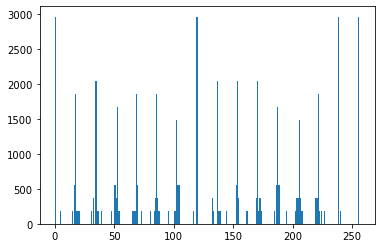

In [24]:
plt.hist(gray_img.ravel(),256,[0,256])
plt.show()